<a href="https://colab.research.google.com/github/YeweiYuan/Iot-Security-Project/blob/master/MLforUDP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **UDP Traffic**


# **Data Preprocessing**

---

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [20]:
import pandas as pd
dataPath = "/content/drive/My Drive/LINUX"
dataName = "/CAMONLY/CAMONLY_NORMAL_00001_20200725232935udp.csv"
camonly = pd.read_csv(dataPath+dataName)
camonly.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device
count,3.552000e+03,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000
mean,1.595726e+09,44.382883,31781.170327,48.067005,32569.380912,32026.037725,46603.349099,24.382883,33341.011824,3.903716
std,5.763820e+03,6.610865,18923.596682,9.947851,18774.443004,2821.981224,8139.624073,6.610865,17830.272863,3.163394
min,1.595716e+09,32.000000,15.000000,40.000000,6.000000,2918.000000,32788.000000,12.000000,234.000000,1.000000
25%,1.595721e+09,36.000000,15430.750000,44.000000,16073.500000,32100.000000,39556.000000,16.000000,19622.000000,1.000000
50%,1.595726e+09,48.000000,31114.500000,47.000000,32553.000000,32100.000000,48475.000000,28.000000,33387.000000,2.000000
75%,1.595731e+09,48.000000,48223.500000,51.000000,48842.750000,32100.000000,53427.000000,28.000000,48697.000000,8.000000
max,1.595736e+09,64.000000,65476.000000,114.000000,65513.000000,60839.000000,60877.000000,44.000000,65512.000000,12.000000


In [21]:
camonly['time'].std()

5763.819835430446

In [23]:
import numpy as np
def task(ds, interval=1,time=3):
  means = []
  for row in ds.itertuples():
    if np.isnan(getattr(row, "diftime")) or getattr(row, "diftime") > interval:
      means.append(0)
      continue
    target = ds[(getattr(row, "time")-ds["time"]<=time) & (getattr(row, "time")-ds["time"]>=0)]
    mean = target["diftime"].mean()
    means.append(mean)
  return means

def whitelist(data, lower = 30, upper =60):
  white = []
  for row in data.itertuples():
    if getattr(row, "eth_src") in list(data[(getattr(row, "time") -data["time"] >lower)& (getattr(row, "time")-data["time"] <upper)]["eth_src"]):
      white.append(1)
    else:
      white.append(0)
  return white

In [24]:
def add_features(df):
  df["diftime"] = df["time"].diff()
  is_white = pd.Series([0]*len(df))
  td0 = pd.Series([0]*len(df))
  for interval in [0.1,0.5,1.5,3]:
    td = pd.Series([0]*len(df))
    tsd = pd.Series([0]*len(df))
    iplmn = pd.Series([0]*len(df))
    iplsd = pd.Series([0]*len(df))
    udplmn = pd.Series([0]*len(df))
    udplsd = pd.Series([0]*len(df))    
    for device in set(df["device"]):
      print("device", device, "begins.bm")
      ds = df[df["device"] == device]
      times = []
      timestds = []
      iplmeans = []
      iplstds = []
      udplmeans = []
      udplstds = []
      for row in ds.itertuples():
        bf = ds[(ds["time"]-getattr(row, "time") >= -interval)&(ds["time"]-getattr(row, "time") <= 0)]
        times.append(bf['time'].count())  
        timestds.append(bf['time'].std())  
        iplmeans.append(bf['ip_len'].mean())
        iplstds.append(bf['ip_len'].std())
        udplmeans.append(bf['udp_len'].mean())
        udplstds.append(bf['udp_len'].std())
      td[ds.index] = times
      tsd[ds.index] = timestds
      iplmn[ds.index] = iplmeans
      iplsd[ds.index] = iplstds
      udplmn[ds.index] = udplmeans
      udplsd[ds.index] = udplstds
    df["pcounts_before_%0.1f" %interval] = td
    df["time_std_before_%0.1f" %interval] = tsd
    df["iplen_mean_before_%0.1f" %interval] = iplmn
    df["iplen_std_before_%0.1f" %interval] = iplsd
    df["udplen_mean_before_%0.1f" %interval] = udplmn
    df["udplen_std_before_%0.1f" %interval] = udplsd
    
    for device in set(df["device"]):
      ds = df[df["device"] == device]
      td0[ds.index] = task(ds)
    df["time_density"] = td0

    #is_white[df.index] = whitelist(df)
    #df["is_new"] = is_white

    df = df.fillna(0)
  return df

In [25]:
import time

time_start=time.time()
camonly = add_features(camonly)
time_end=time.time()
print('time cost',time_end-time_start,'s')

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 10 begins.bm
device 11 begins.bm
device 12 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 10 begins.bm
device 11 begins.bm
device 12 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 10 begins.bm
device 11 begins.bm
device 12 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 10 begins.bm
device 11 begins.bm
device 12 begins.bm
time cost 43.40756893157959 s


In [26]:
camonly[camonly["device"] == 3]

,time,eth_dst,eth_src,ip_len,ip_id,ip_flags,ip_ttl,ip_chksum,ip_src,ip_dst,udp_sport,udp_dport,udp_len,udp_chksum,load,device,diftime,pcounts_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density,pcounts_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,pcounts_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,pcounts_before_3.0,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0
425,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6541,DF,40,24255,61.158.146.163,10.42.0.22,2918,38604,12,37297,b'\xf1p\x00\x00',3,0.376523,1,0.000000,32.0,0.0,12.0,0.0,0.376523,1,0.000000,32.0,0.0,12.0,0.0,1,0.000000,32.0,0.0,12.0,0.0,1,0.000000,32.0,0.0,12.0,0.0
426,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6542,DF,40,24254,61.158.146.163,10.42.0.22,2918,38604,12,37297,b'\xf1p\x00\x00',3,0.002220,2,0.001570,32.0,0.0,12.0,0.0,0.189371,2,0.001570,32.0,0.0,12.0,0.0,2,0.001570,32.0,0.0,12.0,0.0,2,0.001570,32.0,0.0,12.0,0.0
427,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6580,DF,40,24216,61.158.146.163,10.42.0.22,2918,38604,12,37295,b'\xf1r\x00\x00',3,1.790034,1,0.000000,32.0,0.0,12.0,0.0,0.000000,1,0.000000,32.0,0.0,12.0,0.0,1,0.000000,32.0,0.0,12.0,0.0,3,1.034118,32.0,0.0,12.0,0.0
428,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6581,DF,40,24215,61.158.146.163,10.42.0.22,2918,38604,12,37295,b'\xf1r\x00\x00',3,0.020222,2,0.014299,32.0,0.0,12.0,0.0,0.547250,2,0.014299,32.0,0.0,12.0,0.0,2,0.014299,32.0,0.0,12.0,0.0,4,1.039988,32.0,0.0,12.0,0.0
429,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6589,DF,40,24207,61.158.146.163,10.42.0.22,2918,38604,12,37295,b'\xf1r\x00\x00',3,0.259762,1,0.000000,32.0,0.0,12.0,0.0,0.489752,3,0.156139,32.0,0.0,12.0,0.0,3,0.156139,32.0,0.0,12.0,0.0,5,1.041727,32.0,0.0,12.0,0.0
430,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6590,DF,40,24206,61.158.146.163,10.42.0.22,2918,38604,12,37295,b'\xf1r\x00\x00',3,0.039747,2,0.028106,32.0,0.0,12.0,0.0,0.414751,4,0.168273,32.0,0.0,12.0,0.0,4,0.168273,32.0,0.0,12.0,0.0,6,1.013394,32.0,0.0,12.0,0.0


In [27]:
dataName0 = "/CAMPC/CAMPC_CONNECT_30MINudp.csv"
dataName1 = "/CAMPC/CAMPC_NORMAL_00002_20200724013000udp.csv"
dataName2 = "/CAMPC/CAMPC_NORMAL_00003_20200724020000udp.csv"
campc0 = pd.read_csv(dataPath+dataName0)
campc1 = pd.read_csv(dataPath+dataName1)
campc2 = pd.read_csv(dataPath+dataName2)

In [28]:
time_start = time.time()
campc0 = add_features(campc0)
time_end=time.time()
print('time cost',time_end-time_start,'s')

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
time cost 751.5878350734711 s


In [29]:
campc1 = add_features(campc1)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [30]:
campc2 = add_features(campc2)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [31]:
campc = pd.concat([campc0, campc1, campc2])
campc.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device,diftime,pcounts_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density,pcounts_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,pcounts_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,pcounts_before_3.0,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0
count,1.794210e+05,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000
mean,1.595551e+09,38.894265,6463.965606,38.033870,29647.066999,41308.223775,54090.913037,18.894265,35186.336661,2.275893,0.030156,4.214830,0.036439,38.953382,3.658900,18.953382,3.658900,0.030556,17.747755,0.151618,38.893790,5.063020,18.893790,5.063020,52.065756,0.439547,38.897496,5.709302,18.897496,5.709302,103.495215,0.869824,38.913416,6.009833,18.913416,6.009833
std,2.367251e+03,6.892890,15518.217946,3.680886,8650.998390,3837.674197,2285.635675,6.892890,20365.553003,1.140014,0.084620,1.381399,0.009444,3.306419,5.385559,3.306419,5.385559,0.058725,3.682285,0.014110,1.873177,4.485604,1.873177,4.485604,9.632627,0.032308,1.335510,3.591173,1.335510,3.591173,18.716589,0.060509,1.207149,3.484471,1.207149,3.484471
min,1.595546e+09,32.000000,0.000000,36.000000,0.000000,12255.000000,33453.000000,12.000000,0.000000,1.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000
25%,1.595551e+09,38.000000,0.000000,36.000000,28858.000000,43504.000000,54205.000000,18.000000,16110.000000,2.000000,0.011499,3.000000,0.032023,37.333333,1.154701,17.333333,1.154701,0.025843,16.000000,0.145450,37.894737,2.676174,17.894737,2.676174,48.000000,0.430291,38.290909,3.110515,18.290909,3.110515,97.000000,0.860290,38.396226,3.278081,18.396226,3.278081
50%,1.595552e+09,38.000000,0.000000,36.000000,28860.000000,43504.000000,54205.000000,18.000000,39571.000000,2.000000,0.028528,4.000000,0.036997,38.400000,3.000000,18.400000,3.000000,0.027558,18.000000,0.152228,38.421053,3.128974,18.421053,3.128974,55.000000,0.441039,38.745763,3.765875,18.745763,3.765875,109.000000,0.873625,38.916667,6.643858,18.916667,6.643858
75%,1.595553e+09,40.000000,0.000000,36.000000,28860.000000,43504.000000,54205.000000,20.000000,53719.000000,2.000000,0.039302,5.000000,0.041179,39.333333,3.785939,19.333333,3.785939,0.030510,20.000000,0.158929,39.714286,4.407785,19.714286,4.407785,59.000000,0.451958,39.428571,8.331252,19.428571,8.331252,117.000000,0.886995,39.338983,7.331051,19.338983,7.331051
max,1.595554e+09,748.000000,65532.000000,51.000000,65533.000000,60844.000000,58830.000000,728.000000,65535.000000,9.000000,31.735408,25.000000,0.070706,390.000000,506.288455,370.000000,506.288455,15.869329,35.000000,0.243071,220.571429,319.544676,200.571429,319.544676,72.000000,0.552299,125.111111,193.962061,105.111111,193.962061,134.000000,2.027366,101.600000,179.088486,81.600000,179.088486


In [32]:
camonly.to_csv("/content/drive/My Drive/LINUX/udpcapco.csv",index=False,sep=',')
campc.to_csv("/content/drive/My Drive/LINUX/udpcappc.csv",index=False,sep=',')

In [8]:
dataName3 = "/COMHIPRO/CAMHIPRO_CONNECTONLY_00001_20200725194622udp.csv"
dataName4 = "/COMHIPRO/CAMHIPRO_CONNECTONLY_00002_20200725200000udp.csv"
dataName5 = "/COMHIPRO/CAMHIPRO_CONNECTONLY_00003_20200725203000udp.csv"
dataName6 = "/COMHIPRO/CAMHIPRO_VIDEO_00001_20200725210311udp.csv"
dataName7 = "/COMHIPRO/CAMHIPRO_VIDEO_00002_20200725213000udp.csv"
camhip1 = pd.read_csv(dataPath+dataName3)
camhip2 = pd.read_csv(dataPath+dataName4)
camhip3 = pd.read_csv(dataPath+dataName5)
camhip4 = pd.read_csv(dataPath+dataName6)
camhip5 = pd.read_csv(dataPath+dataName7)

In [9]:
camhip1 = add_features(camhip1)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [10]:
camhip2 = add_features(camhip2)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [11]:
camhip3 = add_features(camhip3)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [12]:
camhip4 = add_features(camhip4)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [13]:
camhip5 = add_features(camhip5)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [14]:
camhipc = pd.concat([camhip1, camhip2])
camhipv = pd.concat([camhip3, camhip4, camhip5])
camhipc.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device,diftime,pcounts_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density,pcounts_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,pcounts_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,pcounts_before_3.0,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0
count,1.213000e+04,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000,12130.000000
mean,1.595704e+09,32.414674,32727.786562,62.604452,32255.655235,40578.400989,49740.825721,12.414674,56814.962902,1.648887,0.213867,1.241550,0.006511,32.510893,0.278907,12.510893,0.278907,0.217054,2.676092,0.197074,32.459844,0.433745,12.459844,0.433745,7.315581,0.486638,32.496062,0.583745,12.496062,0.583745,13.621847,0.887997,32.518606,0.677112,12.518606,0.677112
std,7.520926e+02,9.475164,18603.464390,2.583588,18877.986337,1336.297150,1336.747896,9.475164,5067.504441,0.947183,0.126997,0.463905,0.016432,8.327543,7.908037,8.327543,7.908037,0.030644,0.721755,0.049131,3.846613,8.393757,3.846613,8.393757,1.433034,0.078450,3.922520,9.539886,3.922520,9.539886,2.232958,0.140752,4.046050,10.201415,4.046050,10.201415
min,1.595703e+09,32.000000,1.000000,41.000000,8.000000,32100.000000,34789.000000,12.000000,1005.000000,1.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000
25%,1.595703e+09,32.000000,17040.250000,63.000000,15665.000000,40789.000000,49694.000000,12.000000,57488.000000,1.000000,0.102011,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.217584,2.000000,0.171698,32.000000,0.000000,12.000000,0.000000,7.000000,0.476331,32.000000,0.000000,12.000000,0.000000,14.000000,0.902532,32.000000,0.000000,12.000000,0.000000
50%,1.595704e+09,32.000000,31848.000000,63.000000,31846.000000,40789.000000,49694.000000,12.000000,57489.000000,1.000000,0.233048,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.220156,3.000000,0.198130,32.000000,0.000000,12.000000,0.000000,7.000000,0.488480,32.000000,0.000000,12.000000,0.000000,14.000000,0.914821,32.000000,0.000000,12.000000,0.000000
75%,1.595705e+09,32.000000,48564.750000,63.000000,48540.750000,40789.000000,49694.000000,12.000000,57489.000000,3.000000,0.333749,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.221695,3.000000,0.236769,32.000000,0.000000,12.000000,0.000000,8.000000,0.524622,32.000000,0.000000,12.000000,0.000000,14.000000,0.925506,32.000000,0.000000,12.000000,0.000000
max,1.595705e+09,748.000000,65532.000000,63.000000,65532.000000,40789.000000,60139.000000,728.000000,64666.000000,4.000000,1.699150,9.000000,0.070680,748.000000,506.288455,728.000000,506.288455,0.930309,18.000000,0.351891,138.571429,258.332438,118.571429,258.332438,37.000000,0.876192,129.375000,241.666126,109.375000,241.666126,46.000000,1.071021,129.375000,241.666126,109.375000,241.666126


In [15]:
camhipc.to_csv("/content/drive/My Drive/LINUX/udpcaphipc.csv",index=False,sep=',')
camhipv.to_csv("/content/drive/My Drive/LINUX/udpcaphipv.csv",index=False,sep=',')

In [16]:
dataName8 = "/TINYCAM/TinyCamP2P_00001_20200728153719udp.csv"
dataName9 = "/TINYCAM/TinyCamP2P_00002_20200728160000udp.csv"
dataName10 = "/TINYCAM/TinyCamP2P_00003_20200728163000udp.csv"
camtiny1 = pd.read_csv(dataPath+dataName8)
camtiny2 = pd.read_csv(dataPath+dataName9)
camtiny3 = pd.read_csv(dataPath+dataName10)

In [17]:
camtiny1 = add_features(camtiny1)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [18]:
camtiny2 = add_features(camtiny2)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [19]:
camtiny3 = add_features(camtiny3)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [10]:
camtiny = pd.concat([camtiny1,camtiny2, camtiny3])
camtiny.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device,diftime,time_density_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density,is_white,time_density_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_density_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_density_before_3.0,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0
count,8.573000e+04,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000
mean,1.595950e+09,36.728170,34498.578199,62.916202,33193.113636,46969.065683,54931.682270,16.728170,37880.839379,2.995183,0.057746,2.461274,0.043082,36.878472,2.551074,16.878472,2.551074,0.058034,0.981733,9.076496,0.158575,36.747438,3.363591,16.747438,3.363591,26.301855,0.446371,36.741982,3.457773,16.741982,3.457773,51.957296,0.876571,36.741733,3.542553,16.741733,3.542553
std,1.429038e+03,4.336943,18746.970750,1.187985,19701.048598,1076.486877,658.298091,4.336943,16974.206311,0.105877,0.032621,0.778581,0.017604,2.281510,2.552250,2.281510,2.552250,0.004609,0.133915,1.604412,0.017001,1.264037,2.161325,1.264037,2.161325,3.404545,0.037003,1.018318,2.339112,1.018318,2.339112,5.450033,0.070459,0.952080,2.639232,0.952080,2.639232
min,1.595947e+09,32.000000,0.000000,41.000000,1.000000,32100.000000,36370.000000,12.000000,1.000000,1.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,35.000000,0.000000,15.000000,0.000000
25%,1.595948e+09,32.000000,18411.250000,63.000000,15363.000000,47047.000000,54966.000000,12.000000,24971.250000,3.000000,0.031011,2.000000,0.035089,35.000000,0.000000,15.000000,0.000000,0.057184,1.000000,8.000000,0.151812,36.000000,2.777460,16.000000,2.777460,25.000000,0.439330,36.320000,2.749545,16.320000,2.749545,51.000000,0.870680,36.627451,3.115176,16.627451,3.115176
50%,1.595950e+09,38.000000,36105.000000,63.000000,33598.000000,47047.000000,54966.000000,18.000000,45958.000000,3.000000,0.061610,2.000000,0.044150,36.000000,3.464102,16.000000,3.464102,0.058869,1.000000,9.000000,0.160312,36.500000,2.898275,16.500000,2.898275,26.000000,0.450451,36.500000,2.824072,16.500000,2.824072,52.000000,0.882822,36.703704,3.518147,16.703704,3.518147
75%,1.595951e+09,38.000000,50583.000000,63.000000,50923.750000,47047.000000,54966.000000,18.000000,47550.750000,3.000000,0.083347,3.000000,0.057906,38.000000,3.464102,18.000000,3.464102,0.059859,1.000000,10.000000,0.167857,36.666667,3.000000,16.666667,3.000000,27.000000,0.458177,37.111111,4.123451,17.111111,4.123451,53.000000,0.892126,36.769231,3.719872,16.769231,3.719872
max,1.595952e+09,748.000000,65535.000000,63.000000,65534.000000,47047.000000,58378.000000,728.000000,65535.000000,4.000000,0.720120,16.000000,0.070670,80.500000,178.179685,60.500000,178.179685,0.168059,1.000000,31.000000,0.344993,110.166667,201.486220,90.166667,201.486220,68.000000,0.627477,71.185185,141.553665,51.185185,141.553665,111.000000,1.147050,70.240000,141.553665,50.240000,141.553665


In [11]:
camtiny.to_csv("/content/drive/My Drive/LINUX/udpcaptiny.csv",index=False,sep=',')

In [186]:
import pandas as pd
camonly = pd.read_csv('/content/drive/My Drive/LINUX/udpcapco.csv')
camhip = pd.read_csv('/content/drive/My Drive/LINUX/udpcaphip.csv')
campc = pd.read_csv('/content/drive/My Drive/LINUX/udpcappc.csv')
camtiny = pd.read_csv('/content/drive/My Drive/LINUX/udpcaptiny.csv')

In [33]:
campc.groupby('ip_src').count()

,time,eth_dst,eth_src,ip_len,ip_id,ip_flags,ip_ttl,ip_chksum,ip_dst,udp_sport,udp_dport,udp_len,udp_chksum,load,device,diftime,pcounts_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density,pcounts_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,pcounts_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,pcounts_before_3.0,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0
ip_src,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
113.24.59.167,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445
118.181.46.144,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
121.11.118.143,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
36.46.100.242,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
47.13.217.103,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
47.254.36.28,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214
47.52.252.114,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214
47.93.129.21,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191
58.101.161.102,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586


In [34]:
cap = pd.concat([campc,camonly])

In [35]:
capip = cap.groupby('ip_src').count()
nsources = capip[capip['time']>30].index.tolist()
nsources

['113.24.59.167',
 '47.254.36.28',
 '47.52.252.114',
 '47.93.129.21',
 '58.101.161.102',
 '95.223.117.243']

In [190]:
#cap["device"] = [0]*len(cap)
#sources = list(set(cap["ip_src"]))
#sources

In [36]:
cap["source"] = [0]*len(cap)
dp = 1
for nsource in nsources:
  cap['source'] += cap["ip_src"].apply(lambda x: dp if x == nsource else 0)
  dp += 1
cap.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device,diftime,pcounts_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density,pcounts_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,pcounts_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,pcounts_before_3.0,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0,source
count,1.829730e+05,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000
mean,1.595555e+09,39.000814,6955.440912,38.228640,29703.797003,41128.031480,53945.559203,19.000814,35150.513923,2.307493,0.137671,4.159690,0.035752,39.094493,3.639071,19.094493,3.639071,0.065382,17.435239,0.149233,39.030392,5.023705,19.030392,5.023705,51.089505,0.432627,39.032034,5.659500,19.032034,5.659500,101.521727,0.855461,39.047712,5.955607,19.047712,5.955607,4.250939
std,2.426366e+04,6.929013,15977.838050,4.137955,8966.057246,4029.454852,2734.180592,6.929013,20320.899415,1.232499,2.054226,1.425662,0.010564,3.481332,5.362857,3.481332,5.362857,0.795992,4.272932,0.024350,2.178489,4.485626,2.178489,4.485626,11.797198,0.065370,1.733208,3.618622,1.733208,3.618622,23.244090,0.126123,1.637677,3.518237,1.637677,3.518237,1.621921
min,1.595546e+09,32.000000,0.000000,36.000000,0.000000,2918.000000,32788.000000,12.000000,0.000000,1.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000
25%,1.595551e+09,38.000000,0.000000,36.000000,28858.000000,36181.000000,54205.000000,18.000000,16186.000000,2.000000,0.011489,3.000000,0.031645,37.428571,1.154701,17.428571,1.154701,0.025830,16.000000,0.145024,37.900000,2.653476,17.900000,2.653476,44.000000,0.429575,38.301887,3.101282,18.301887,3.101282,85.000000,0.859384,38.403361,3.260051,18.403361,3.260051,5.000000
50%,1.595552e+09,38.000000,0.000000,36.000000,28860.000000,43504.000000,54205.000000,18.000000,39367.000000,2.000000,0.028725,4.000000,0.036833,38.500000,3.000000,18.500000,3.000000,0.027574,18.000000,0.152048,38.444444,3.120143,18.444444,3.120143,55.000000,0.440700,38.771930,3.718252,18.771930,3.718252,109.000000,0.873197,38.943089,6.635314,18.943089,6.635314,5.000000
75%,1.595553e+09,40.000000,0.000000,43.000000,28860.000000,43504.000000,54205.000000,20.000000,53618.000000,2.000000,0.040012,5.000000,0.041066,39.500000,3.785939,19.500000,3.785939,0.032021,20.000000,0.158840,39.909091,4.455067,19.909091,4.455067,59.000000,0.451771,39.466667,8.336840,19.466667,8.336840,116.000000,0.886730,39.357798,7.331388,19.357798,7.331388,5.000000
max,1.595736e+09,748.000000,65532.000000,114.000000,65533.000000,60844.000000,60877.000000,728.000000,65535.000000,12.000000,59.769940,25.000000,0.070706,390.000000,506.288455,370.000000,506.288455,29.903059,35.000000,0.340120,220.571429,319.544676,200.571429,319.544676,72.000000,0.976860,125.111111,193.962061,105.111111,193.962061,134.000000,2.078909,101.600000,179.088486,81.600000,179.088486,6.000000


In [37]:
cap.groupby('source').count()

,time,eth_dst,eth_src,ip_len,ip_id,ip_flags,ip_ttl,ip_chksum,ip_src,ip_dst,udp_sport,udp_dport,udp_len,udp_chksum,load,device,diftime,pcounts_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density,pcounts_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,pcounts_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,pcounts_before_3.0,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0
source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140
1,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445
2,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415
3,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418
4,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
5,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586
6,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736


In [38]:
cap.head()

,time,eth_dst,eth_src,ip_len,ip_id,ip_flags,ip_ttl,ip_chksum,ip_src,ip_dst,udp_sport,udp_dport,udp_len,udp_chksum,load,device,diftime,pcounts_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density,pcounts_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,pcounts_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,pcounts_before_3.0,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0,source
0,1.595546e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,48,41922,DF,44,19617,47.254.36.28,10.42.0.22,32100,43924,28,48845,b'\xf1\x91\x00\x10\x00\x02\x94\xab\xc3\xedoX\x...,3,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000,2
1,1.595546e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,48,18742,DF,47,18389,47.93.129.21,10.42.0.22,32100,43924,28,25205,b'\xf1\x91\x00\x10\x00\x02\x94\xab\xc3\xedoX\x...,1,0.035480,1,0.000000,48.0,0.000000,28.0,0.000000,0.035480,1,0.000000,48.0,0.000000,28.0,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000,4
2,1.595546e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,48,48642,DF,51,21460,47.52.252.114,10.42.0.22,32100,43924,28,59200,b'\xf1\x91\x00\x10\x00\x02\x94\xab\xc3\xedoX\x...,6,0.109544,1,0.000000,48.0,0.000000,28.0,0.000000,0.109544,1,0.000000,48.0,0.000000,28.0,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000,3
3,1.595546e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,48,45534,DF,41,16773,47.254.36.28,10.42.0.22,32100,45452,28,14489,b'\xf1\x01\x00\x10\x00\x02\x15x\xc3\xedoX\x00\...,3,31.735408,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000,2
4,1.595546e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,36,45536,DF,41,16783,47.254.36.28,10.42.0.22,32100,45452,16,33133,b'\xf1\x11\x00\x04\x00\x00\x00\x00',3,0.003250,2,0.002298,42.0,8.485281,22.0,8.485281,15.869329,2,0.002298,42.0,8.485281,22.0,8.485281,2,0.002298,42.0,8.485281,22.0,8.485281,2,0.002298,42.0,8.485281,22.0,8.485281,2


In [40]:
#data0 = cap[['source', 'ip_len', 'udp_len' ,'time_density','time_density_before_0.1','time_density_before_0.5','time_density_before_1.5','time_density_before_3.0','time_std_before_0.1',	'iplen_mean_before_0.1',	'iplen_std_before_0.1',	'udplen_mean_before_0.1',	'udplen_std_before_0.1',	'time_std_before_0.5',	'iplen_mean_before_0.5',	'iplen_std_before_0.5',	'udplen_mean_before_0.5',	'udplen_std_before_0.5',	'time_std_before_1.5',	'iplen_mean_before_1.5',	'iplen_std_before_1.5',	'udplen_mean_before_1.5',	'udplen_std_before_1.5',	'time_std_before_3.0',	'iplen_mean_before_3.0',	'iplen_std_before_3.0',	'udplen_mean_before_3.0',	'udplen_std_before_3.0']]
data0 = cap[['source', 'ip_len', 'udp_len' ,'time_density','pcounts_before_0.1','pcounts_before_0.5','pcounts_before_1.5','pcounts_before_3.0','time_std_before_0.1',	'iplen_mean_before_0.1',	'iplen_std_before_0.1',	'udplen_mean_before_0.1',	'udplen_std_before_0.1',	'time_std_before_0.5',	'iplen_mean_before_0.5',	'iplen_std_before_0.5',	'udplen_mean_before_0.5',	'udplen_std_before_0.5',	'time_std_before_1.5',	'iplen_mean_before_1.5',	'iplen_std_before_1.5',	'udplen_mean_before_1.5',	'udplen_std_before_1.5',	'time_std_before_3.0',	'iplen_mean_before_3.0',	'iplen_std_before_3.0',	'udplen_mean_before_3.0',	'udplen_std_before_3.0']]
#data = cap[['device', 'ip_len', 'udp_len','time_density_before_0.1',	'time_std_before_0.1',	'iplen_mean_before_0.1',	'iplen_std_before_0.1',	'udplen_mean_before_0.1',	'udplen_std_before_0.1',	'time_density_before_0.5',	'time_std_before_0.5',	'iplen_mean_before_0.5',	'iplen_std_before_0.5',	'udplen_mean_before_0.5',	'udplen_std_before_0.5',	'time_density_before_1.5',	'time_std_before_1.5',	'iplen_mean_before_1.5',	'iplen_std_before_1.5',	'udplen_mean_before_1.5',	'udplen_std_before_1.5',	'time_density_before_5.0',	'time_std_before_5.0',	'iplen_mean_before_5.0',	'iplen_std_before_5.0',	'udplen_mean_before_5.0',	'udplen_std_before_5.0']]
#data = cap[['device', 'ip_len', 'udp_len','time_density_before_0.1',	'time_std_before_0.1',	'iplen_mean_before_0.1',	'iplen_std_before_0.1',	'udplen_mean_before_0.1',	'udplen_std_before_0.1',	'time_density_before_0.5',	'time_std_before_0.5',	'iplen_mean_before_0.5',	'iplen_std_before_0.5',	'udplen_mean_before_0.5',	'udplen_std_before_0.5',	'time_density_before_1.5',	'time_std_before_1.5',	'iplen_mean_before_1.5',	'iplen_std_before_1.5',	'udplen_mean_before_1.5',	'udplen_std_before_1.5']]
#data = cap[['device', 'ip_len', 'ip_ttl', 'udp_len']]
data0.head()

,source,ip_len,udp_len,time_density,pcounts_before_0.1,pcounts_before_0.5,pcounts_before_1.5,pcounts_before_3.0,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0
0,2,48,28,0.000000,1,1,1,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000
1,4,48,28,0.035480,1,1,1,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000
2,3,48,28,0.109544,1,1,1,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000
3,2,48,28,0.000000,1,1,1,1,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000,0.000000,48.0,0.000000,28.0,0.000000
4,2,36,16,15.869329,2,2,2,2,0.002298,42.0,8.485281,22.0,8.485281,0.002298,42.0,8.485281,22.0,8.485281,0.002298,42.0,8.485281,22.0,8.485281,0.002298,42.0,8.485281,22.0,8.485281


In [41]:
def bin(x):
  digits = str('{0:016b}'.format(x))
  return digits

In [42]:
#data = data.join(pd.DataFrame(cap["ip_chksum"].apply(bin).astype(str).str.findall(".").values.tolist()).add_prefix('ip_chksum'))
data = data0.join(pd.DataFrame(cap["udp_chksum"].apply(bin).astype(str).str.findall(".").values.tolist()).add_prefix('udp_chksum').astype(int))
data.head()

,source,ip_len,udp_len,time_density,pcounts_before_0.1,pcounts_before_0.5,pcounts_before_1.5,pcounts_before_3.0,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3,udp_chksum4,udp_chksum5,udp_chksum6,udp_chksum7,udp_chksum8,udp_chksum9,udp_chksum10,udp_chksum11,udp_chksum12,udp_chksum13,udp_chksum14,udp_chksum15
0,2,48,28,0.00000,1,1,1,1,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,1
0,5,38,18,0.00000,1,1,1,1,0.0,38.0,0.0,18.0,0.0,0.0,38.0,0.0,18.0,0.0,0.0,38.0,0.0,18.0,0.0,0.0,38.0,0.0,18.0,0.0,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,1
0,5,38,18,0.00000,1,1,1,1,0.0,38.0,0.0,18.0,0.0,0.0,38.0,0.0,18.0,0.0,0.0,38.0,0.0,18.0,0.0,0.0,38.0,0.0,18.0,0.0,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,1
0,2,48,28,0.00000,1,1,1,1,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,1
1,4,48,28,0.03548,1,1,1,1,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0,1,1,0,0,0,1,0,0,1,1,1,0,1,0,1


In [43]:
data = data.reset_index(drop=True)

In [44]:
data.describe()

,source,ip_len,udp_len,time_density,pcounts_before_0.1,pcounts_before_0.5,pcounts_before_1.5,pcounts_before_3.0,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3,udp_chksum4,udp_chksum5,udp_chksum6,udp_chksum7,udp_chksum8,udp_chksum9,udp_chksum10,udp_chksum11,udp_chksum12,udp_chksum13,udp_chksum14,udp_chksum15
count,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000,182973.000000
mean,4.250939,39.000814,19.000814,0.065382,4.159690,17.435239,51.089505,101.521727,0.035752,39.094493,3.639071,19.094493,3.639071,0.149233,39.030392,5.023705,19.030392,5.023705,0.432627,39.032034,5.659500,19.032034,5.659500,0.855461,39.047712,5.955607,19.047712,5.955607,0.608696,0.496390,0.518066,0.537948,0.473458,0.551464,0.482219,0.543517,0.431058,0.532712,0.456231,0.562897,0.524394,0.466736,0.494270,0.518798
std,1.621921,6.929013,6.929013,0.795992,1.425662,4.272932,11.797198,23.244090,0.010564,3.481332,5.362857,3.481332,5.362857,0.024350,2.178489,4.485626,2.178489,4.485626,0.065370,1.733208,3.618622,1.733208,3.618622,0.126123,1.637677,3.518237,1.637677,3.518237,0.488043,0.499988,0.499675,0.498559,0.499296,0.497346,0.499685,0.498104,0.495226,0.498930,0.498082,0.496030,0.499406,0.498894,0.499969,0.499648
min,0.000000,32.000000,12.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,38.000000,18.000000,0.025830,3.000000,16.000000,44.000000,85.000000,0.031645,37.428571,1.154701,17.428571,1.154701,0.145024,37.900000,2.653476,17.900000,2.653476,0.429575,38.301887,3.101282,18.301887,3.101282,0.859384,38.403361,3.260051,18.403361,3.260051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,38.000000,18.000000,0.027574,4.000000,18.000000,55.000000,109.000000,0.036833,38.500000,3.000000,18.500000,3.000000,0.152048,38.444444,3.120143,18.444444,3.120143,0.440700,38.771930,3.718252,18.771930,3.718252,0.873197,38.943089,6.635314,18.943089,6.635314,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,5.000000,40.000000,20.000000,0.032021,5.000000,20.000000,59.000000,116.000000,0.041066,39.500000,3.785939,19.500000,3.785939,0.158840,39.909091,4.455067,19.909091,4.455067,0.451771,39.466667,8.336840,19.466667,8.336840,0.886730,39.357798,7.331388,19.357798,7.331388,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,6.000000,748.000000,728.000000,29.903059,25.000000,35.000000,72.000000,134.000000,0.070706,390.000000,506.288455,370.000000,506.288455,0.340120,220.571429,319.54467

In [45]:
data.shape

(182973, 44)

# **Machine Learning**

---

> 


In [46]:
from sklearn.model_selection import train_test_split
import time

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [48]:
data.head()

,source,ip_len,udp_len,time_density,pcounts_before_0.1,pcounts_before_0.5,pcounts_before_1.5,pcounts_before_3.0,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_std_before_3.0,iplen_mean_before_3.0,iplen_std_before_3.0,udplen_mean_before_3.0,udplen_std_before_3.0,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3,udp_chksum4,udp_chksum5,udp_chksum6,udp_chksum7,udp_chksum8,udp_chksum9,udp_chksum10,udp_chksum11,udp_chksum12,udp_chksum13,udp_chksum14,udp_chksum15
0,2,48,28,0.00000,1,1,1,1,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,1
1,5,38,18,0.00000,1,1,1,1,0.0,38.0,0.0,18.0,0.0,0.0,38.0,0.0,18.0,0.0,0.0,38.0,0.0,18.0,0.0,0.0,38.0,0.0,18.0,0.0,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,1
2,5,38,18,0.00000,1,1,1,1,0.0,38.0,0.0,18.0,0.0,0.0,38.0,0.0,18.0,0.0,0.0,38.0,0.0,18.0,0.0,0.0,38.0,0.0,18.0,0.0,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,1
3,2,48,28,0.00000,1,1,1,1,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,1
4,4,48,28,0.03548,1,1,1,1,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0.0,48.0,0.0,28.0,0.0,0,1,1,0,0,0,1,0,0,1,1,1,0,1,0,1


In [49]:
data.shape

(182973, 44)

In [50]:
#dataset = datahash
dataset = data
x=dataset.values[:,1:43]
y=dataset.values[:,0]
print(x.shape)
print(y.shape)

(182973, 42)
(182973,)


In [51]:
from sklearn import preprocessing
# normalize the data attributes
normalized_x = preprocessing.normalize(x)

In [48]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(normalized_x)

ValueError: ignored

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [51]:
sel2 = SelectKBest(chi2, k=40)
X_new = sel2.fit_transform(normalized_x, y)
print('scores_:\n',sel2.scores_)

scores_:
 [5.54457878e+00 4.78189828e+00 2.75620993e+00 4.53939030e+03
 1.52965514e+00 7.94796729e-01 3.06660238e+01 1.95295551e+01
 3.06660238e+01 4.83701373e+00 8.71489824e-01 5.72489662e+01
 1.69537440e+01 5.72489662e+01 1.41241820e+01 1.07047550e+00
 6.89076366e+01 1.65758489e+01 6.89076366e+01 2.96229389e+01
 1.28914564e+00 7.09314556e+01 1.58152144e+01 7.09314556e+01
 3.26552083e+01 1.18081826e+01 8.79778216e+00 1.38979472e+01
 1.02765764e+01 2.07452017e+01 1.14433803e+01 1.96764475e+01
 1.01511027e+00 1.88665304e+01 1.31909266e+01 4.59046976e+00
 2.54864553e+00 2.05423952e+00 5.30397158e+00 1.95025380e+00]


In [ ]:
#sel3 = SelectKBest(chi2, k=36) 
#X_new = sel3.fit_transform(X, y)
#selcolum = sel3.get_support(True)

In [ ]:
#dataset = data.iloc[:,selcolum]

In [ ]:
#dataset.describe()

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(x_train.shape , x_test.shape)
print(y_train.shape , y_test.shape)

(146378, 42) (36595, 42)
(146378,) (36595,)


In [53]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(normalized_x, y, test_size = 0.2)
print(x_train.shape , x_test.shape)
print(y_train.shape , y_test.shape)

(146378, 42) (36595, 42)
(146378,) (36595,)


In [54]:
datacor = data.corr()

In [ ]:
datacor

,device,ip_len,udp_len,time_density_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_density_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_density_before_5.0,time_std_before_5.0,iplen_mean_before_5.0,iplen_std_before_5.0,udplen_mean_before_5.0,udplen_std_before_5.0,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3,udp_chksum4,udp_chksum5,udp_chksum6,udp_chksum7,udp_chksum8,udp_chksum9,udp_chksum10,udp_chksum11,udp_chksum12,udp_chksum13,udp_chksum14,udp_chksum15
device,1.000000,0.055269,0.055269,0.392651,0.119401,0.074262,-0.004695,0.074262,-0.004695,0.684060,-0.175584,0.149355,0.010475,0.149355,0.010475,0.743501,-0.081253,0.173545,0.000787,0.173545,0.000787,0.750457,-0.023062,0.168453,0.009106,0.168453,0.009106,-0.183108,-0.191360,-0.117189,0.056207,0.202876,0.048958,0.216086,0.046437,-0.147394,0.035924,0.210257,-0.111888,0.168735,0.082486,0.188311,-0.019328
ip_len,0.055269,1.000000,1.000000,0.140813,0.085765,0.616549,0.415511,0.616549,0.415511,0.115467,-0.151509,0.398091,0.295402,0.398091,0.295402,0.097322,-0.105504,0.331396,0.230865,0.331396,0.230865,0.097928,-0.102732,0.321048,0.204643,0.321048,0.204643,-0.161783,-0.101503,-0.203772,0.152049,0.073395,0.115554,0.078064,0.144212,-0.040021,0.156867,0.088014,-0.195185,0.060515,0.183964,0.075638,-0.051833
udp_len,0.055269,1.000000,1.000000,0.140813,0.085765,0.616549,0.415511,0.616549,0.415511,0.115467,-0.151509,0.398091,0.295402,0.398091,0.295402,0.097322,-0.105504,0.331396,0.230865,0.331396,0.230865,0.097928,-0.102732,0.321048,0.204643,0.321048,0.204643,-0.161783,-0.101503,-0.203772,0.152049,0.073395,0.115554,0.078064,0.144212,-0.040021,0.156867,0.088014,-0.195185,0.060515,0.183964,0.075638,-0.051833
time_density_before_0.1,0.392651,0.140813,0.140813,1.000000,0.233734,0.233503,0.218298,0.233503,0.218298,0.671959,-0.030979,0.294025,0.164540,0.294025,0.164540,0.585039,0.177943,0.244197,0.151947,0.244197,0.151947,0.564287,0.184274,0.233203,0.139364,0.233203,0.139364,-0.137615,-0.181912,-0.120914,0.100988,0.179697,0.101409,0.187435,0.099659,-0.171572,0.100037,0.184208,-0.112617,0.175910,0.108775,0.183207,-0.035518
time_std_before_0.1,0.119401,0.085765,0.085765,0.233734,1.000000,0.117985,0.072619,0.117985,0.072619,0.360720,-0.060830,0.182569,0.126845,0.182569,0.126845,0.397129,0.105387,0.238523,0.193920,0.238523,0.193920,0.401124,0.213145,0.248564,0.209607,0.248564,0.209607,-0.110640,-0.137858,-0.126827,0.125300,0.139382,0.127719,0.140620,0.126640,-0.147129,0.125668,0.134215,-0.119972,0.137818,0.117335,0.136816,-0.046804
iplen_mean_before_0.1,0.074262,0.616549,0.616549,0.233503,0.117985,1.000000,0.685900,1.000000,0.685900,0.175058,-0.291956,0.658872,0.486059,0.658872,0.486059,0.133794,-0.214892,0.551877,0.378771,0.551877,0.378771,0.132512,-0.208833,0.534038,0.332685,0.534038,0.332685,-0.166368,-0.146448,-0.166446,0.136558,0.149872,0.129020,0.134191,0.138451,-0.108346,0.143063,0.136722,-0.163809,0.120620,0.157428,0.130524,-0.045969
iplen_std_before_0.1,-0.004695,0.415511,0.415511,0.218298,0.072619,0.685900,1.000000,0.685900,1.000000,0.091420,-0.023139,0.392926,0.530926,0.392926,0.530926,0.062783,0.005232,0.257485,0.365938,0.257485,0.365938,0.055084,-0.003425,0.236559,0.298369,0.236559,0.298369,-0.014400,-0.056145,-0.016883,0.002609,0.054084,0.009980,0.038416,0.019471,-0.039611,0.022270,0.035620,-0.013603,0.038829,0.017922,0.036302,-0.012301
udplen_mean_before_0.1,0.074262,0.616549,0.616549,0.233503,0.117985,1.000000,0.685900,1.000000,0.685900,0.175058,-0.291956,0.658872,0.486059,0.658872,0.486059,0.133794,-0.214892,0.551877,0.378771,0.551877,0.378771,0.132512,-0.208833,0.534038,0.332685,0.534038,0.332685,-0.166368,-0.146448,-0.166446,0.136558,0.149872,0.129020,0.134191,0.138451,-0.108346,0.143063,0.136722,

---
> RandomForest

In [57]:
from sklearn.ensemble import RandomForestClassifier as rfc           
clf = rfc()
time_start=time.time()

clf.fit(x_train, y_train)   

time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 64.93901419639587 s


In [58]:
y_pred = clf.predict(x_test)

In [59]:
clf.score(x_test,y_test) 

0.9868288017488728

In [60]:
importances = clf.feature_importances_

In [61]:
import numpy as np
import matplotlib.pyplot as plt
print("importances：", importances)
x_columns = data.columns[1:]
indices = np.argsort(importances)[::-1]
x_columns_indices = []
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, x_columns[indices[f]], importances[indices[f]]))
    x_columns_indices.append(x_columns[indices[f]])

importances： [0.00817976 0.00786423 0.1634708  0.00840685 0.07565109 0.18943528
 0.19263123 0.00859722 0.00550854 0.00322413 0.00589649 0.00415786
 0.00807796 0.02509416 0.01070017 0.01911223 0.01090019 0.01101343
 0.01857247 0.01255904 0.03839771 0.01317783 0.01931791 0.02940533
 0.02059671 0.03458107 0.01912696 0.00739692 0.00339162 0.00459682
 0.00260176 0.00285482 0.00167992 0.00343056 0.0013931  0.00140171
 0.00154495 0.00143586 0.001521   0.0010538  0.001063   0.00097751]
 1) pcounts_before_3.0             0.192631
 2) pcounts_before_1.5             0.189435
 3) time_density                   0.163471
 4) pcounts_before_0.5             0.075651
 5) udplen_mean_before_1.5         0.038398
 6) udplen_mean_before_3.0         0.034581
 7) iplen_mean_before_3.0          0.029405
 8) iplen_mean_before_0.5          0.025094
 9) iplen_std_before_3.0           0.020597
10) time_std_before_3.0            0.019318
11) udplen_std_before_3.0          0.019127
12) udplen_mean_before_0.5       

In [62]:
im = 0
for f in range(x_train.shape[1]):
    im = im+importances[indices[f]]
    print("%2d) %-*s %f" % (f + 1, 30, x_columns[indices[f]], im))

 1) pcounts_before_3.0             0.192631
 2) pcounts_before_1.5             0.382067
 3) time_density                   0.545537
 4) pcounts_before_0.5             0.621188
 5) udplen_mean_before_1.5         0.659586
 6) udplen_mean_before_3.0         0.694167
 7) iplen_mean_before_3.0          0.723573
 8) iplen_mean_before_0.5          0.748667
 9) iplen_std_before_3.0           0.769263
10) time_std_before_3.0            0.788581
11) udplen_std_before_3.0          0.807708
12) udplen_mean_before_0.5         0.826820
13) iplen_mean_before_1.5          0.845393
14) udplen_std_before_1.5          0.858571
15) iplen_std_before_1.5           0.871130
16) time_std_before_1.5            0.882143
17) udplen_std_before_0.5          0.893043
18) iplen_std_before_0.5           0.903744
19) time_std_before_0.1            0.912341
20) pcounts_before_0.1             0.920748
21) ip_len                         0.928927
22) time_std_before_0.5            0.937005
23) udp_len                     

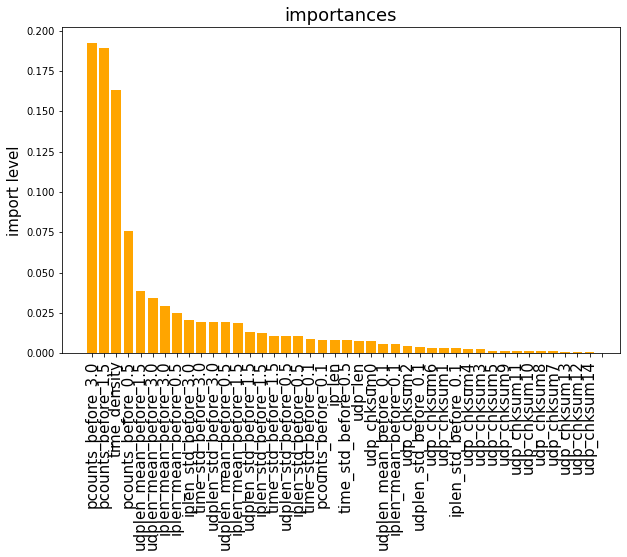

In [63]:
threshold = 0.01
x_selected = x_train[:, importances > threshold]
plt.figure(figsize=(10, 6))
plt.title("importances", fontsize=18)
plt.ylabel("import level", fontsize=15, rotation=90)
#plt.rcParams['axes.unicode_minus'] = False
for i in range(42):
    plt.bar(i, importances[indices[i]], color='orange', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=90, fontsize=15)
plt.show()

In [64]:
accuracy_score(y_test, y_pred)

0.9868288017488728

In [65]:
confusion_matrix(y_test, y_pred)

array([[   25,     0,     0,     0,     0,     0,     0],
       [    0,  6899,     0,     1,     0,    18,    27],
       [    0,     0,   253,     6,    15,     0,     0],
       [    0,     0,    11,   258,    14,     0,     0],
       [    0,     0,     9,     7,   211,     0,     0],
       [    0,     5,     0,     0,     0, 26872,     2],
       [    1,   334,     0,     0,     0,    32,  1595]])

---
> 

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
modelb = GaussianNB()
time_start=time.time()
modelb.fit(x_train1, y_train1)
time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 0.1622447967529297 s


In [68]:
y_pred1 = modelb.predict(x_test1)

In [69]:
accuracy_score(y_test1, y_pred1)

0.9265200163956825

In [72]:
confusion_matrix(y_test1, y_pred1)

array([[   25,     0,     0,     0,     1,     0,     0],
       [    5,  5736,     0,     0,     0,   889,   176],
       [    4,     0,   116,     8,   176,     0,     0],
       [   16,     0,     2,   165,   112,     0,     0],
       [   15,     0,     1,    21,   217,     0,     0],
       [   33,   137,     2,     9,     1, 26306,   475],
       [   12,  1374,     0,     0,     0,   475,    86]])

---

In [73]:
from sklearn.svm import SVC
model = SVC()
time_start=time.time()
model.fit(x_train1, y_train1)
time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 1638.4351961612701 s


In [ ]:
y_pred1 = model.predict(x_test1)

In [ ]:
accuracy_score(y_test1, y_pred1)

In [16]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
time_start=time.time()
model.fit(x_train1, y_train1)
time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 739.1256790161133 s


---
> Sequential Model_Softmax multi-classification based on multilayer perceptron

In [224]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD


model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
model.add(Dense(64, activation='relu', input_dim=42))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [225]:
y_train_h = keras.utils.to_categorical(y_train1, num_classes=9)
y_test_h = keras.utils.to_categorical(y_test1, num_classes=9)

In [ ]:
model.fit(x_train1, y_train_h,
          epochs=100,
          batch_size=35)

Epoch 1/100
6182/6182 [==============================] - 7s 1ms/step - loss: 0.3181 - accuracy: 0.9036
Epoch 2/100
6182/6182 [==============================] - 7s 1ms/step - loss: 0.2028 - accuracy: 0.9348
Epoch 3/100
6182/6182 [==============================] - 7s 1ms/step - loss: 0.1906 - accuracy: 0.9373
Epoch 4/100
6182/6182 [==============================] - 7s 1ms/step - loss: 0.1841 - accuracy: 0.9380
Epoch 5/100
6182/6182 [==============================] - 7s 1ms/step - loss: 0.1776 - accuracy: 0.9391
Epoch 6/100
6182/6182 [==============================] - 7s 1ms/step - loss: 0.1732 - accuracy: 0.9399
Epoch 7/100
6182/6182 [==============================] - 7s 1ms/step - loss: 0.1689 - accuracy: 0.9406
Epoch 8/100
6182/6182 [==============================] - 7s 1ms/step - loss: 0.1667 - accuracy: 0.9412
Epoch 9/100
6182/6182 [==============================] - 7s 1ms/step - loss: 0.1660 - accuracy: 0.9409
Epoch 10/100
6182/6182 [==============================] - 7s 1ms/step - l

In [ ]:
score = model.evaluate(x_test1, y_test_h, batch_size=35)

1546/1546 [==============================] - 1s 911us/step - loss: 0.1214 - accuracy: 0.9477


---
> Anomaly Detection

In [73]:
anormaldata, normaldata = [x for _, x in data.groupby(data['source'] > 0)]

*isolation forest

In [70]:
from sklearn.ensemble import IsolationForest

In [71]:
features = x_columns[indices[0:43]]

In [72]:
normaldata_det = normaldata[features]
anormaldata_det = anormaldata[features]
normaldata_det.describe()

NameError: ignored

In [166]:
normaldata_train0, normaldata_test0 = train_test_split(normaldata, test_size = 0.2)
normaldata_train, normaldata_test = train_test_split(normaldata_det, test_size = 0.2)
len(normaldata_test)

36567

In [ ]:
#cost somany time
#from sklearn import svm
#svmdet = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)
#test0 = svmdet.fit(normaldata_train0)
#isanormal = test0.predict(anormaldata_det)
#isanormal

In [139]:

test = IsolationForest(random_state=0).fit(normaldata_train)

In [140]:
#isanormal = test.predict(anormaldata)
isanormal = test.predict(anormaldata_det)
isanormal

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1])

In [141]:
rate0 = np.sum(isanormal == -1)/len(isanormal)
print('The discrimination rate of abnormal data: %f'%rate0)

The discrimination rate of abnormal data: 1.000000


In [142]:
isnormal = test.predict(normaldata_test)
isnormal

array([ 1,  1,  1, ...,  1, -1,  1])

In [143]:
rate = np.sum(isnormal == -1)/len(isnormal)
print('The misjudgment rate of normal data： %f'%rate)

The misjudgment rate of normal data： 0.194000


In [74]:
rate0 = []
rate = []
tim = []
for i in range(1,43,2):
   print('%d begins'%i)
   features = x_columns[indices[0:i]]
   normaldata_det = normaldata[features]
   anormaldata_det = anormaldata[features]
   normaldata_train, normaldata_test = train_test_split(normaldata_det, test_size = 0.1)
   time_start=time.time()
   test = IsolationForest(random_state=0).fit(normaldata_train)
   time_end=time.time()
   tim.append(time_end-time_start)
   isanormal = test.predict(anormaldata_det)
   rate0.append(np.sum(isanormal == -1)/len(isanormal))
   isnormal = test.predict(normaldata_test)
   rate.append(np.sum(isnormal == -1)/len(isnormal))

1 begins
3 begins
5 begins
7 begins
9 begins
11 begins
13 begins
15 begins
17 begins
19 begins
21 begins
23 begins
25 begins
27 begins
29 begins
31 begins
33 begins
35 begins
37 begins
39 begins
41 begins


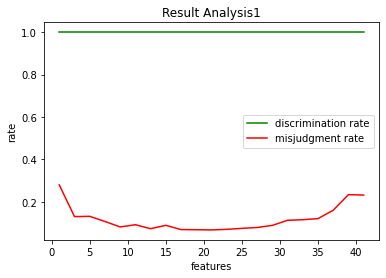

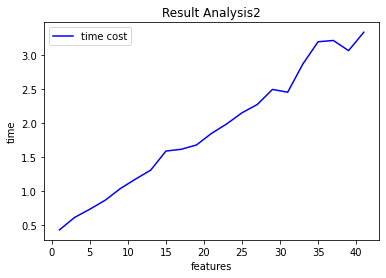

In [75]:
plt.title('Result Analysis1')
plt.plot(range(1,43,2), rate0, color='green', label='discrimination rate')
plt.plot(range(1,43,2), rate, color='red', label='misjudgment rate')
plt.legend() 

plt.xlabel('features')
plt.ylabel('rate')
plt.show()

plt.title('Result Analysis2')
plt.plot(range(1,43,2), tim, color='blue', label='time cost')
plt.legend() 

plt.xlabel('features')
plt.ylabel('time')
plt.show()

In [76]:
print('%d features is the best with misjudgement rate %f'%(2*rate.index(min(rate))+1,min(rate)))

21 features is the best with misjudgement rate 0.067436


---
> Hash

In [ ]:
datahash = cap[['device', 'ip_len', 'ip_ttl', 'udp_len']]

In [ ]:
def bin(x):
  digits = str('{0:016b}'.format(x))
  return digits

In [ ]:
def hash(s):
  shash = s[:3]
  return shash

In [ ]:
datahash = datahash.join(pd.DataFrame(cap["ip_chksum"].apply(bin).astype(str).str.findall("....").values.tolist()).add_prefix('ip_chksum'))
datahash = datahash.join(pd.DataFrame(cap["udp_chksum"].apply(bin).astype(str).str.findall("....").values.tolist()).add_prefix('udp_chksum'))
datahash.head()

,device,ip_len,ip_ttl,udp_len,ip_chksum0,ip_chksum1,ip_chksum2,ip_chksum3,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3
0,10,48,41,28,1000,0100,0111,0100,1010,0110,0100,0100
0,13,38,36,18,1000,0100,0111,0100,1010,0110,0100,0100
0,13,38,36,18,1000,0100,0111,0100,1010,0110,0100,0100
0,10,48,44,28,1000,0100,0111,0100,1010,0110,0100,0100
0,11,32,63,12,1000,0100,0111,0100,1010,0110,0100,0100


In [ ]:
for col in ['ip_chksum0',	'ip_chksum1',	'ip_chksum2',	'ip_chksum3',	'udp_chksum0',	'udp_chksum1',	'udp_chksum2',	'udp_chksum3']:
  datahash[col] = datahash[col].apply(hash)
datahash.head()

,device,ip_len,ip_ttl,udp_len,ip_chksum0,ip_chksum1,ip_chksum2,ip_chksum3,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3
0,10,48,41,28,100,010,011,010,101,011,010,010
0,13,38,36,18,100,010,011,010,101,011,010,010
0,13,38,36,18,100,010,011,010,101,011,010,010
0,10,48,44,28,100,010,011,010,101,011,010,010
0,11,32,63,12,100,010,011,010,101,011,010,010


In [ ]:
datahash.reset_index(drop=True)
datahash = datahash.astype(int)
datahash.describe()

,device,ip_len,ip_ttl,udp_len,ip_chksum0,ip_chksum1,ip_chksum2,ip_chksum3,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3
count,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000
mean,12.170684,38.765459,46.601073,18.765459,16.664191,7.245658,96.336110,85.634553,55.790946,58.514906,50.257174,60.541986
std,1.048580,7.477088,13.105836,7.477088,23.265596,26.171932,23.525262,41.121476,50.234023,49.586884,50.424019,49.552130
min,1.000000,32.000000,36.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,38.000000,36.000000,18.000000,11.000000,0.000000,101.000000,100.000000,1.000000,10.000000,1.000000,10.000000
50%,13.000000,38.000000,36.000000,18.000000,11.000000,0.000000,101.000000,101.000000,100.000000,100.000000,11.000000,100.000000
75%,13.000000,40.000000,63.000000,20.000000,11.000000,0.000000,101.000000,110.000000,101.000000,101.000000,101.000000,101.000000
max,14.000000,748.000000,114.000000,728.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000


In [ ]:
1/22

0.045454545454545456

In [ ]:
   features = x_columns[indices[3:20]]
   normaldata_det = normaldata[features]
   anormaldata_det = anormaldata[features]
   normaldata_train, normaldata_test = train_test_split(normaldata_det, test_size = 0.1)
   time_start=time.time()
   test = IsolationForest(random_state=0).fit(normaldata_train)
   time_end=time.time()
   tim.append(time_end-time_start)
   isanormal = test.predict(anormaldata_det)
   rate0.append(np.sum(isanormal == -1)/len(isanormal))
   isnormal = test.predict(normaldata_test)
   

In [ ]:
np.sum(isnormal == -1)

3636

In [ ]:
len(isnormal)

27031

In [ ]:
np.sum(isnormal == -1)/len(isnormal)

0.1345122267026747

In [ ]:
rate

[0.16407088158040767,
 0.1588916429284895,
 0.16636454441197143,
 0.17132181569309313,
 0.15367540971477192,
 0.17161777218748844,
 0.1598535015352743,
 0.1400244164107876]

In [ ]:
rate

[0.3012097221708409,
 0.2929969294513706,
 0.19270467241315525,
 0.17764788576079316,
 0.17335651659206097,
 0.15082682845621695,
 0.13946949798379638,
 0.1461655136694906,
 0.15056786652362103,
 0.14272501942214494,
 0.16203618068143982,
 0.1402463837815841,
 0.15282453479338537,
 0.16466279456919833,
 0.17405941326624985,
 0.19355554733454183,
 0.2049868669305612,
 0.19096592800858272,
 0.252783840775406,
 0.24889941178646738,
 0.317339351115386]